# ___Cost Function - Logistic Regression___
-----------------

In [44]:
import numpy as np
np.seterr(all = "raise")
import matplotlib.pyplot as plt

In [45]:
# the squared error cost function that we've used for linear regression is not an ideal cost function for logistic regression!
# imagine a training datset for a classification problem!
# it contains the following predictors

# 1) age of the patient
# 2) tumour size
# 3) RBC count
# 4) WBC count
# 5) platelets count
# 6) haemoglobin content
# 7) blood pH

# and a target variable - tumour status
# which is a nominal categorical variable - that can be either benign or malignant

In [46]:
# this is a binary classification task and the logistic regression model is,

# ___$f_{\overrightarrow{w}, b}(\overrightarrow{x}) = \frac{1}{1 + e^{- \overrightarrow{w} \cdot \overrightarrow{x} + b}}$___

In [47]:
# recall, that for linear regression the model was,

# ___$f_{\overrightarrow{w}, b}(\overrightarrow{x}) = \overrightarrow{w} \cdot \overrightarrow{x} + b$___

In [48]:
# and the cost function was,

# ___$j(\overrightarrow{w}, b) = \frac{1}{2N}\sum_{i = 0}^{N}(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}) - y_i)^2$___
# ___$j(\overrightarrow{w}, b) = \frac{1}{2N}\sum_{i = 0}^{N}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [49]:
# the issue here is that the cost function of logistic regression will not produce a smooth convex curve like the cost function of 
# linear regression did
# cost function of logistic regression will produce a non-convex staggered curve with numerous local minima
# the presence of many local minima will affect the gradient descent!
# hence, the need for a new, improved cost function!

In [50]:
# we can move the 1/2 from 1/2N inside the summation, like so

# ___$j(\overrightarrow{w}, b) = \frac{1}{N}\sum_{i = 0}^{N}\frac{1}{2}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [51]:
# the loss term for a single training record (row) here is,
# (the subscript i denotes the ith record in the training data)
# N is the total number of records

# ___$\frac{1}{2}(\overrightarrow{w} \cdot \overrightarrow{x_i} + b - y_i)^2$___

In [52]:
# this term can be expressed as a function of the model and the true label
# loss per record can thus be redefined as,

# ___$j(\overrightarrow{w}, b) = \frac{1}{N}\sum_{i = 0}^{N}L(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i)$___

In [53]:
# where L denotes the loss per record

In [54]:
# the loss function used for logistic regression is,

# ___$L(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}), y_i) = 
\begin{cases}
-log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~~~~~~~~\text{if}~~~y_i = 1\\
-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))~~~~\text{if}~~~y_i = 0\\
\end{cases}$___

In [55]:
# this new loss function is a conditional function that uses different expressions depending on the value of the true label in the training data

In [56]:
# if the true label is 1 for a given record, then the loss function is 

# $-log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$

In [57]:
# if the training label for a select row is 0, then the loss function is,

# $-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$
_but_
# $log(x - y) = log(x) - log(y)$
_hence_
# $-log(1 - f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$
# $-log(1) + log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$
# $log(f_{\overrightarrow{w}, b}(\overrightarrow{x_i}))$

-------------------
## ___Loss function vs. Cost function___
-------------------

In [58]:
# loss function is a function that computes the deviation of the prediction from the expected outcome per record or row
# cost function is the one that averages all the losses over all the records in the training dataset!

-----------------------

In [59]:
# how the loss function changes with x when the actual target is 1 and 0

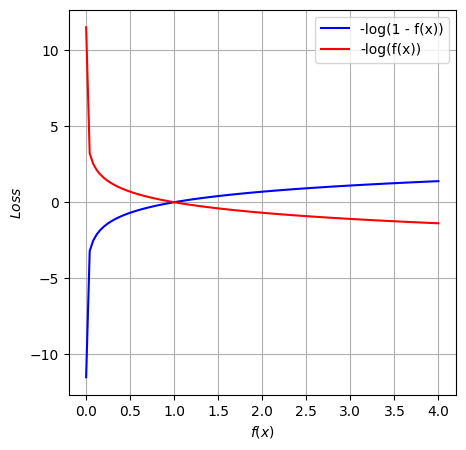

In [95]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

f = np.linspace(0.00001, 4, num = 100)
y_teq1 = -np.log(f)
y_teq0 = np.log(f)
axes.plot(f, y_teq0, label = "-log(1 - f(x))", color = "blue", marker = "none", linestyle = "-")
axes.plot(f, y_teq1, label = "-log(f(x))", color = "red",  marker = "none", linestyle = "-")
axes.legend()
axes.grid()
axes.set_xlabel(r"$f(x)$")
axes.set_ylabel(r"$Loss$")
plt.show()

In [ ]:
# but remember, f(x) here represents the output of logistic regression and hence will always be in the range of 0 and 1
# thus, we can safely ignore the part of the graph where f > 1

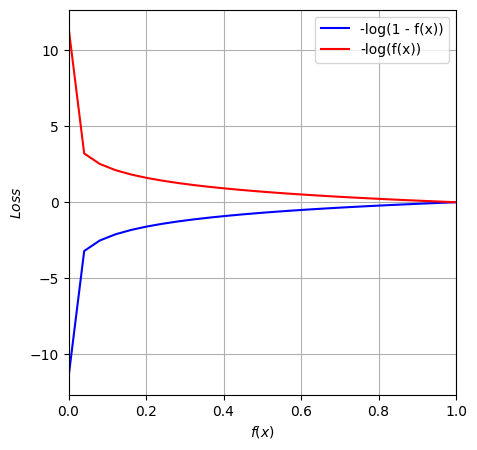

In [96]:
fig, axes = plt.subplots()
fig.set_size_inches(5, 5)

f = np.linspace(0.00001, 4, num = 100)
y_teq1 = -np.log(f)
y_teq0 = np.log(f)
axes.plot(f, y_teq0, label = "-log(1 - f(x))", color = "blue", marker = "none", linestyle = "-")
axes.plot(f, y_teq1, label = "-log(f(x))", color = "red",  marker = "none", linestyle = "-")
axes.legend()
axes.grid()
axes.set_xlabel(r"$f(x)$")
axes.set_xlim(0, 1)
axes.set_ylabel(r"$Loss$")
plt.show()